## 1. Installing Required Libraries

In [ ]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.6 MB/s eta 0:00:00


In [ ]:
!pip install ctime

  Preparing metadata (setup.py) ... done
  Created wheel for ctime: filename=ctime-1.0.0-py3-none-any.whl size=2673 sha256=d9549a89a8ba0e17344f51164171f583c73a90bae420c6a0b526f327aa469cd6
  Stored in directory: /root/.cache/pip/wheels/9e/e0/b5/931e02f22d8e9bdf979e6451e9d246a253e049638a9af7cc67
Successfully built ctime


In [ ]:
import numpy as np                           #numerical python library
import pandas as pd                          #data manipulation and analysis library

%matplotlib inline
import matplotlib.pyplot as plt              #plotting library

from netCDF4 import Dataset                  #reading netcdf files

import cftime                                #for time conversion
import datetime                              #for date manipulation
from datetime import datetime

## 2. Loading Files

In [ ]:
#load nc file from google drive
ncfile = '/content/drive/MyDrive/Project Learnings/Data/dt_global_satellite_sla_199302_202305.nc'

In [ ]:
# Open the netCDF file specified by 'ncfile' in read-only mode ('r')
# and assign it to the file handle 'fh'
fh = Dataset(ncfile, mode = 'r')

In [ ]:
fh

<class 'netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version 2.0.4 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    source: Altimetry measurements
    institution: CNES, CLS
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Monthly Mean of Sea Level Anomalies referenced to the [1993, 2012] period
    contact: http://climate.copernicus.eu/c3s-user-service-desk
    creator_email: http://climate.copernicus.eu/c3s-user-service-desk
    creator_name: Copernicus Climate Change Service (C3S)
    creator_url: http://climate.copernicus.eu
    date_created: 2022-06-30T18:56:32Z: Creation
    date_issued: 2022-06-30T18:56:32Z: Creation
    date_modified: 2022-06-30T18:56:32Z: Creation
    geospatial_lat_max: 89.875
    geospatial_lat_min: -89.875
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 359.875
    geospatial_lon_min:

**Global Attributes:**

* **CDI:** Version of the Climate Data Interface used.
* Conventions: Specifies the file format, which is CF-1.6 (Climate and Forecast metadata conventions).
* Source and Institution: Indicates that the data originates from altimetry measurements managed by CNES and CLS, institutions involved in climate data processing.
* Metadata_Conventions: Unidata Dataset Discovery conventions v1.0.
* Date Created/Issued/Modified: Indicates that the file was created on June 30, 2022, and last processed in April 2024.
* **Geospatial Attributes:**
* Latitude and Longitude Range:
Latitudes span from -89.875 to 89.875 degrees, covering nearly the entire globe.
Longitudes cover 0.125 to 359.875 degrees.
* Resolution: 0.25 degrees in both latitude and longitude, which suggests that the data grid is fine enough for detailed mapping.
* Vertical Dimension: The vertical extent of the data is from 0.0 downwards, meaning it's likely focused on surface-level (sea level) data.
History: Documents the processing history, mentioning how different datasets were merged.
* Variables: The main variable of interest here is sla, which represents sea level anomalies. This variable is typically provided as a grid of values that vary over time and space. Each cell in this grid would contain the sea level anomaly at a specific location (latitude and longitude) and time.

The file uses monthly-averaged sea level anomalies relative to the reference period of 1993 to 2023, making it a useful resource for analyzing long-term sea level trends globally.

## 3. Assigning variables

In [ ]:
print(fh.variables.keys())

dict_keys(['time', 'time_bnds', 'longitude', 'longitude_bnds', 'latitude', 'latitude_bnds', 'crs', 'sla'])


In [ ]:
print(fh.dimensions.keys())

dict_keys(['time', 'bnds', 'longitude', 'latitude'])


In [ ]:
#extracting the sla variable
sla = fh.variables['sla'][:]
print(sla.shape)                 # Check the shape to understand dimensions

(364, 720, 1440)


In [ ]:
time_var = fh.variables['time']                             #extracting date variable
dates = cftime.num2date(time_var[:], units=time_var.units)  #converting date to datetime format

In [ ]:
print(dates[:5])

[cftime.DatetimeGregorian(1993, 2, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 3, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 4, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 5, 15, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 6, 15, 0, 0, 0, 0, has_year_zero=False)]


In [ ]:
lon  = fh.variables['longitude'][:]                     #extracting longitude variable
lat  = fh.variables['latitude'][:]                      #extracting latitude variable

In [ ]:
#converting dates to datetime format
dates_converted = [datetime(d.year, d.month, d.day) for d in dates]

In [ ]:
print(dates_converted[:5])

[datetime.datetime(1993, 2, 15, 0, 0), datetime.datetime(1993, 3, 15, 0, 0), datetime.datetime(1993, 4, 15, 0, 0), datetime.datetime(1993, 5, 15, 0, 0), datetime.datetime(1993, 6, 15, 0, 0)]


## 4. Prepare data to work on ports

In [ ]:
# Define coordinates for each port (approximate)
# Each subregion will cover 1x1 degree around the port
ports = {
    "Vishakhapatnam": {"lat": 17.7, "lon": 83.3},
    "Kandla": {"lat": 23.0, "lon": 70.2},
    "Mumbai": {"lat": 19.0, "lon": 72.8},
    "Paradip": {"lat": 20.3, "lon": 86.6},
    "Cochin": {"lat": 9.9, "lon": 76.3}
}

In [ ]:
# Function to get index range for a specified grid point with 1x1 degree tolerance
def get_grid_indices(lat, lon, lat_values, lon_values, tolerance=0.5):
    lat_indices = np.where((lat_values >= lat - tolerance) & (lat_values <= lat + tolerance))[0]
    lon_indices = np.where((lon_values >= lon - tolerance) & (lon_values <= lon + tolerance))[0]
    return lat_indices, lon_indices

In [ ]:
# Loop through each port and extract data
subregion_data = {}                                          #creates empty dict
for port, coords in ports.items():
    lat_idx, lon_idx = get_grid_indices(coords["lat"], coords["lon"], lat, lon)

    # Extract temperature data for the subregion
    subregion_sla = sla[:, lat_idx[0]:lat_idx[-1] + 1, lon_idx[0]:lon_idx[-1] + 1]
    subregion_sla_mean = np.mean(subregion_sla, axis=(1, 2))  # Mean over spatial dimensions (lat, lon)

    # Store in dictionary
    subregion_data[port] = subregion_sla_mean

**Purpose:**

This code iterates through a list of ports, extracts the sea level anomaly (SLA) data for a subregion around each port, calculates the mean SLA for that subregion, and stores the results in a dictionary.

Steps:

    Initialization: subregion_data = {} creates an empty dictionary to store the results.

    Looping Through Ports:
        for port, coords in ports.items(): iterates through the ports dictionary (defined earlier in your code), where port represents the name of the port and coords contains its latitude and longitude.

    Getting Grid Indices:
        lat_idx, lon_idx = get_grid_indices(coords["lat"], coords["lon"], lat, lon) calls the get_grid_indices function (explained previously) to find the indices of the latitude and longitude values within the lat and lon arrays that correspond to the current port's location.

    Extracting Subregion Data:
        subregion_sla = sla[:, lat_idx[0]:lat_idx[-1] + 1, lon_idx[0]:lon_idx[-1] + 1] extracts the SLA data for the subregion around the port.
            sla[:, ...]: Selects all time steps (:) and the specified latitude and longitude ranges using the indices obtained in the previous step.

    Calculating Mean SLA:
        subregion_sla_mean = np.mean(subregion_sla, axis=(1, 2)) calculates the mean SLA over the spatial dimensions (latitude and longitude) for each time step. This gives you the average SLA within the subregion for each time point.

    Storing Data:
        subregion_data[port] = subregion_sla_mean stores the calculated mean SLA for the current port in the subregion_data dictionary, with the port name as the key.

In summary, this code extracts the relevant SLA data for each port, computes the average SLA within a subregion around each port, and organizes this information into a dictionary for further analysis or plotting

## 5. Plotting the time- series

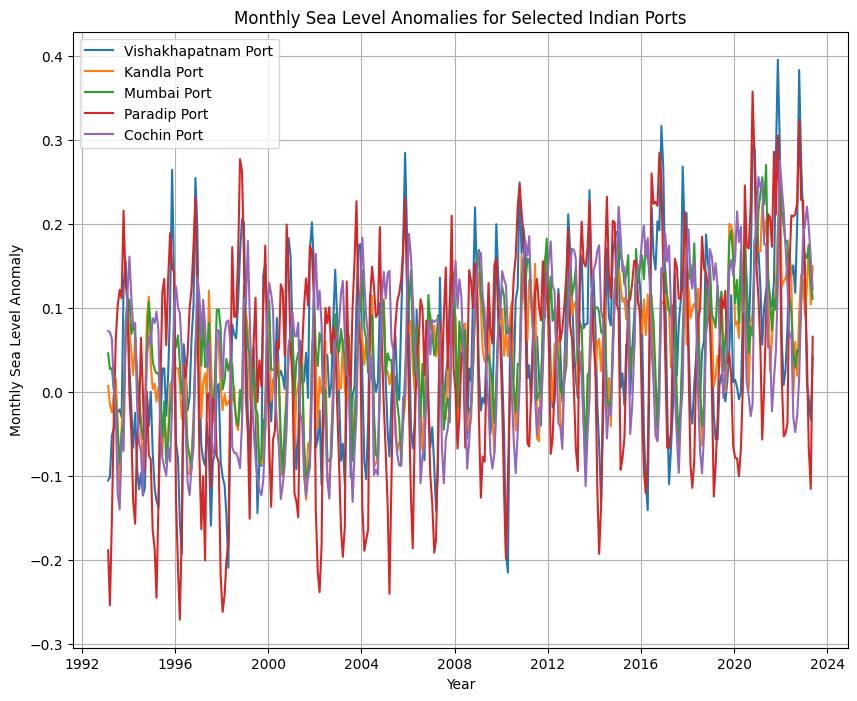

In [ ]:
# Plotting monthly anomalies time series for each port
fig, ax = plt.subplots(figsize=(10, 8))
for port, anomalies in subregion_data.items():
    ax.plot(dates_converted, anomalies, label=f"{port} Port")

ax.set_title("Monthly Sea Level Anomalies for Selected Indian Ports")
ax.set_xlabel("Year")
ax.set_ylabel("Monthly Sea Level Anomaly")
ax.legend()
plt.grid()
plt.show()

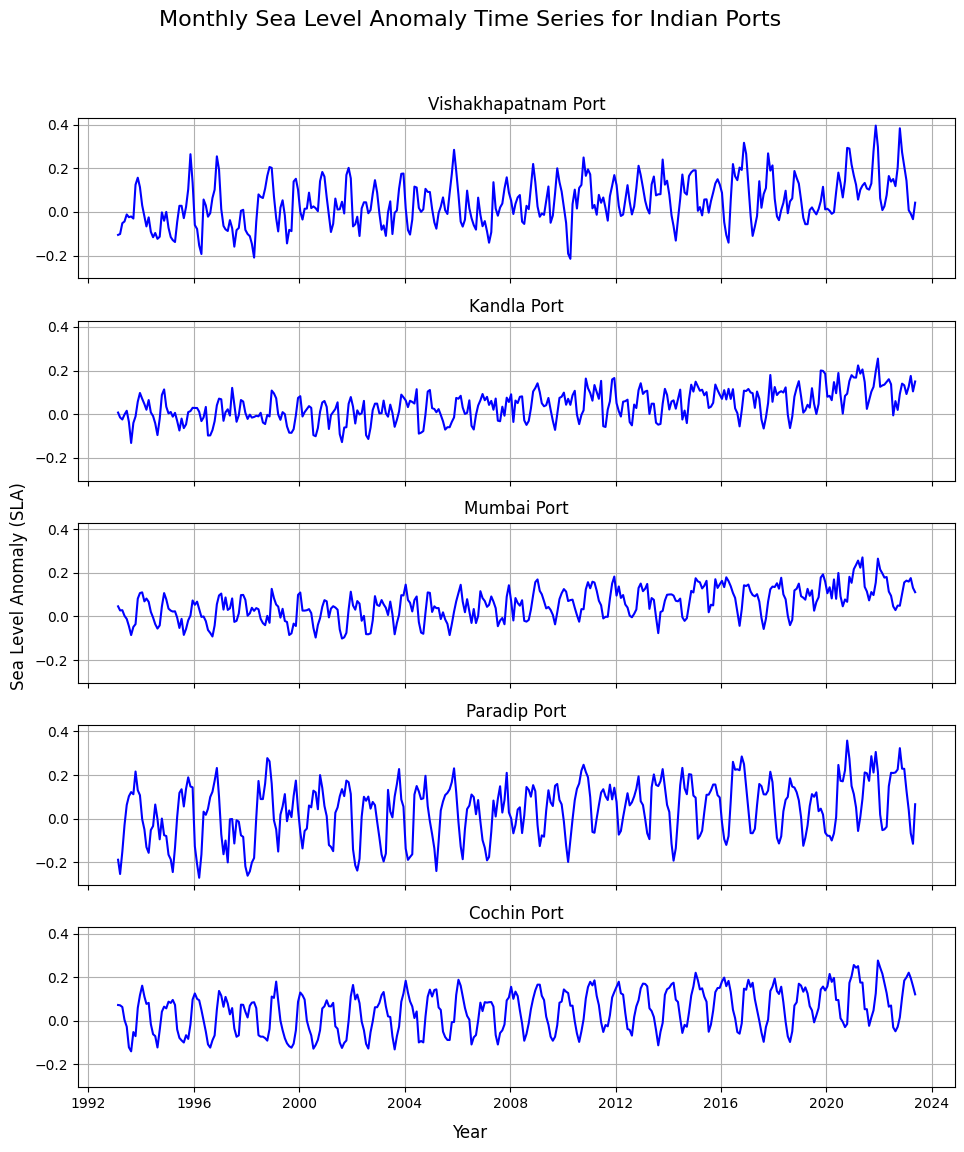

In [ ]:
# Number of ports to plot
n_ports = len(subregion_data)

# Set up the figure and subplots
fig, axes = plt.subplots(n_ports, 1, figsize=(10, 12), sharex=True, sharey=True)

# Loop through each port's data and plot on individual subplot
for i, (port, anomalies) in enumerate(subregion_data.items()):
    ax = axes[i]  # Get the i-th axis in the array
    ax.grid()
    #ax.plot(anomalies.index, anomalies, label=port, color="b")
    ax.plot(dates_converted, anomalies, label=port, color="b")
    ax.set_title(f"{port} Port")  # Set title for each port

# Set common y-axis label and main title
fig.text(0.04, 0.5, 'Sea Level Anomaly (SLA)', va='center', rotation='vertical', fontsize=12)
fig.suptitle("Monthly Sea Level Anomaly Time Series for Indian Ports", fontsize=16)
fig.text(0.5, 0.04, "Year", ha='center', fontsize=12)

# Adjust spacing
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Leave space for the main title and y-label

# Show the plot
plt.show()

**Code Explanation**
* `enumerate(subregion_data.items())`: This part generates a sequence of tuples, where each tuple contains:
The index (position) of the item in the dictionary. The key-value pair of the item itself.

* `i, (port, anomalies)`: This unpacks the tuple generated by enumerate into three variables:

i: Stores the index of the current item.

port: Stores the key of the current item (which is the port name in this case).

anomalies: Stores the value of the current item (which is the time series of sea level anomalies for the port).



1. **Seasonal Variability:** All ports, particularly Vishakhapatnam, Paradip, and Mumbai, show a recurring
seasonal pattern in sea level anomalies, with oscillations above and below the mean SLA.

2. **Long-term Trend Variability:**
Mumbai and Kandla display a slight upward trend in SLAs over time, indicating a gradual rise in sea levels at
these locations.
Vishakhapatnam, Cochin and Paradip have more fluctuating trends, with notable peaks and troughs, though no clear
long-term upward or downward trend is evident.


3. **Inter-Regional Differences:** While there is a broad similarity in seasonal oscillations, the amplitude and
variability of SLAs differ across ports. Vishakhapatnam and Paradip show higher fluctuations in SLA compared
to Kandla and Mumbai.

4. **Implications for Coastal Areas:** The seasonal patterns and gradual trends observed in certain ports may
affect coastal planning and management, as regions with rising SLAs may face increased risks of flooding,
especially during high anomaly periods.